In [4]:
%matplotlib inline
import pandas as pd
import datetime
import dataset

In [ ]:
node_id = '001e06113ace'

end = datetime.date.today() + datetime.timedelta(days=1)
start = end - datetime.timedelta(days=15)
dates = [start + datetime.timedelta(days=i) for i in range((end - start).days + 1)]

urlfmt = 'http://www.mcs.anl.gov/research/projects/waggle/downloads/datasets/2/{node_id}/{date}.csv.gz'
df = dataset.load_datasets([urlfmt.format(node_id=node_id, date=date) for date in dates])

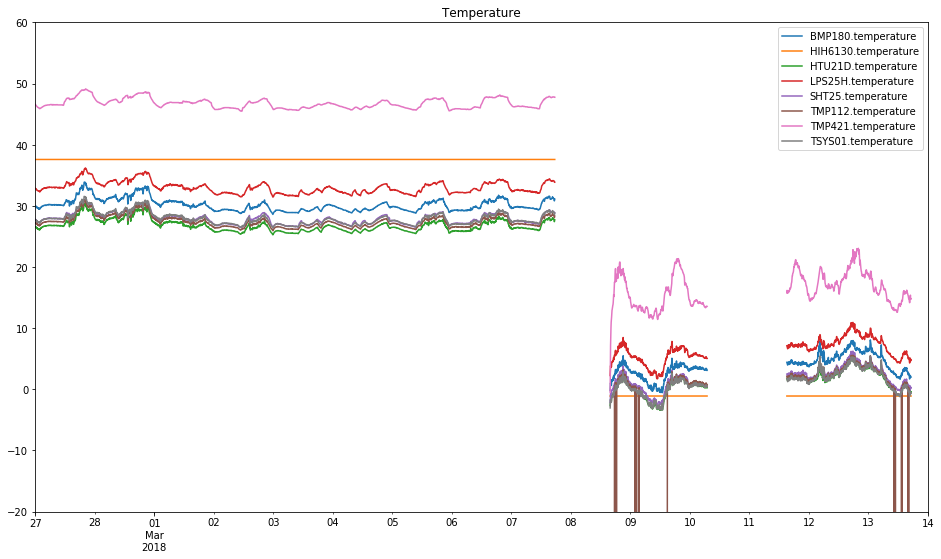

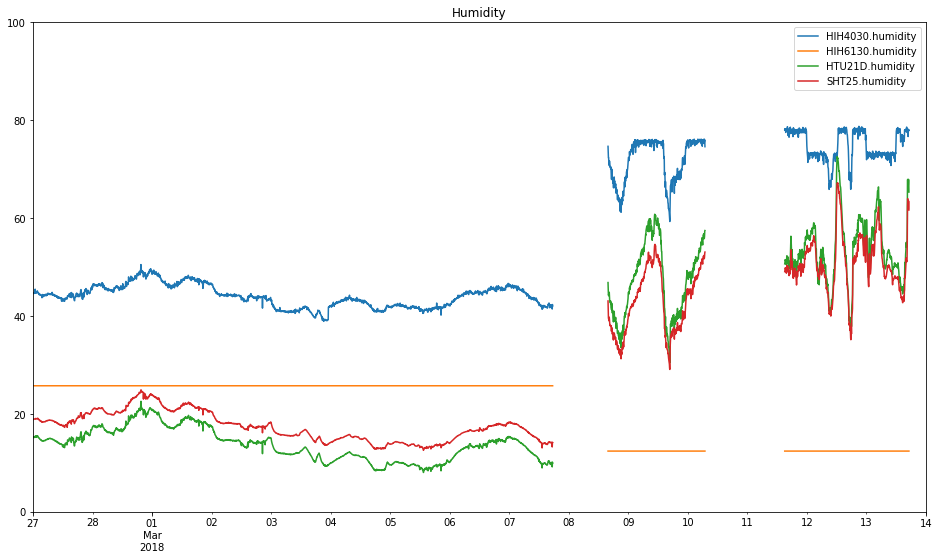

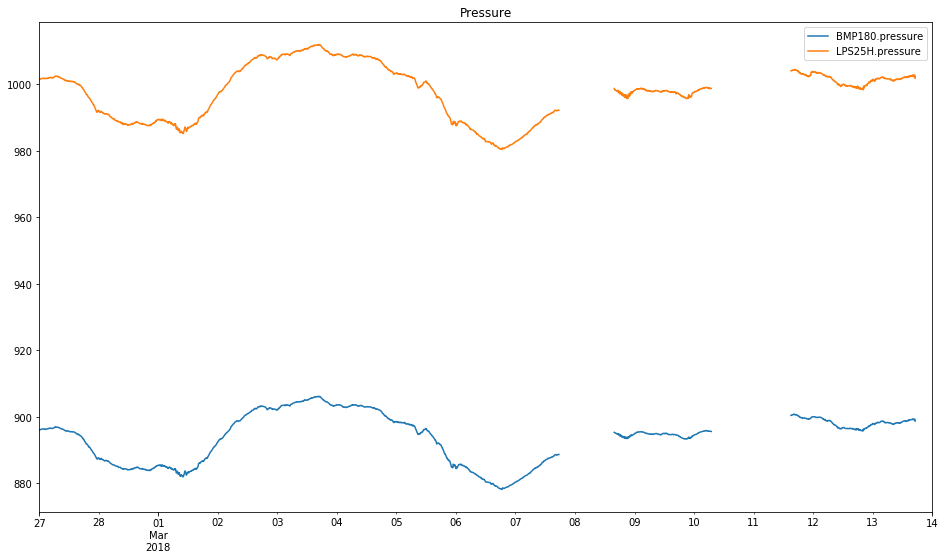

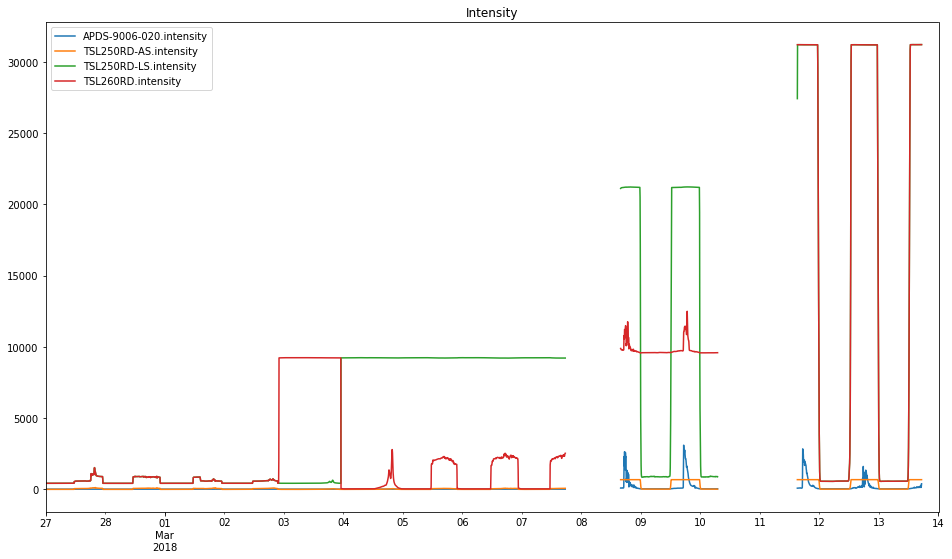

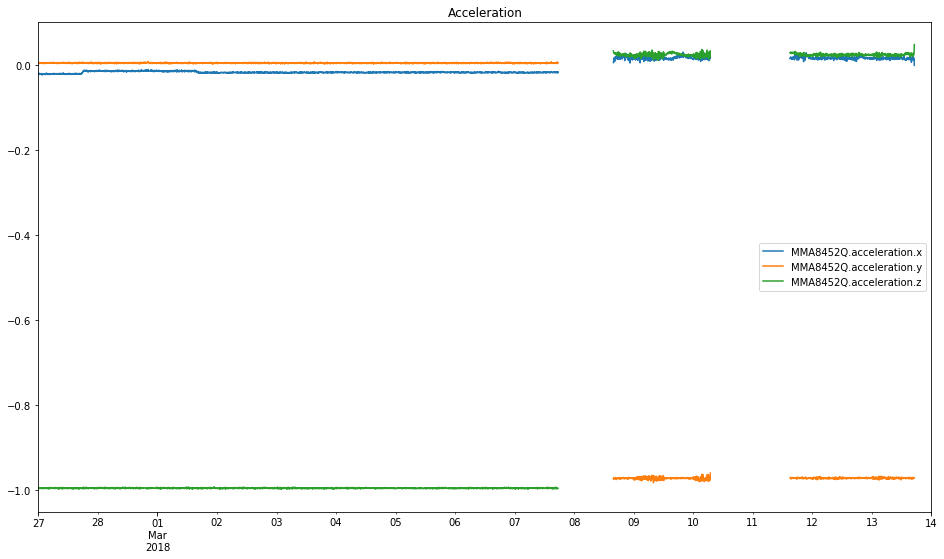

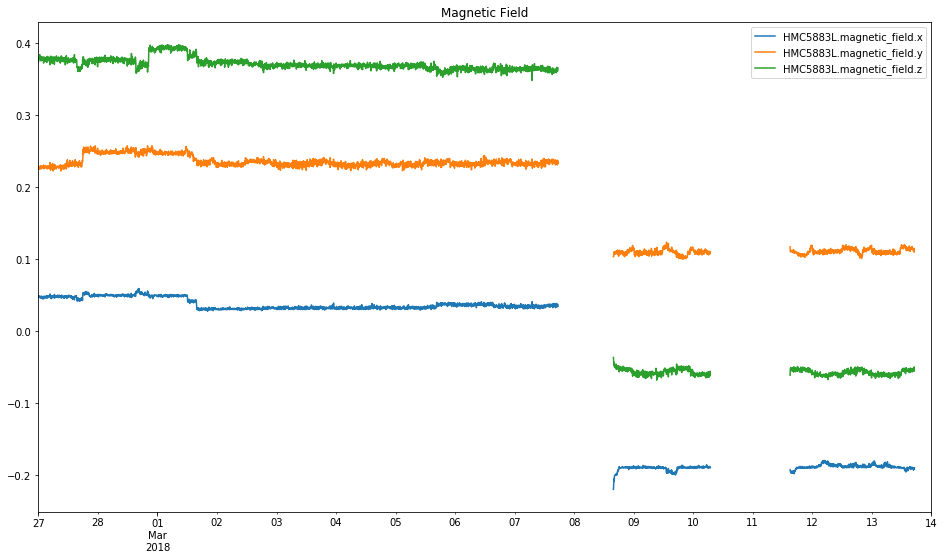

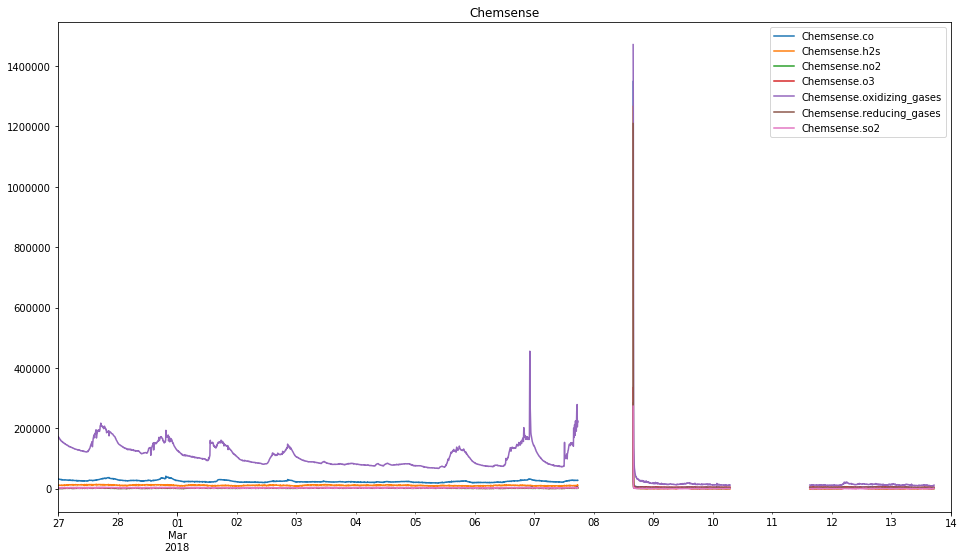

In [3]:
plots = {
    'Temperature': {
        'filter': lambda c: ('temperature' in c and 'PR' not in c and 'adc_' not in c),
        'limits': (-20.0, 60.0),
    },
    'Humidity': {
        'filter': lambda c: 'humidity' in c,
        'limits': (0.0, 100.0),
    },
    'Pressure': {
        'filter': lambda c: 'pressure' in c,
    },
    'Intensity': {
        'filter': lambda c: 'intensity' in c and 'MLX' not in c and 'SPV' not in c and 'ML85' not in c,
    },
    'Acceleration': {
        'filter': lambda c: 'MMA8452Q' in c,
    },
    'Magnetic Field': {
        'filter': lambda c: 'HMC5883L' in c,
    },
    'ADC Temperature': {
        'filter': lambda c: 'adc_temperature' in c,
    },
    'Chemsense': {
        'filter': lambda c: 'Chemsense' in c and 'mac_address' not in c and 'at' not in c,
    },
    'PM': {
        'filter': lambda c: 'pm.' in c,
    },
}

def show_plots(df):
    figsize = (16, 9)
    xlim = (min(dates), max(dates))
    
    for title, options in plots.items():
        columns = list(filter(options['filter'], df.columns))

        if len(columns) == 0:
            continue

        df[columns].plot(figsize=figsize, title=title, xlim=xlim, ylim=options.get('limits', None))

show_plots(df.resample('5Min').mean())